In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
import pandas as pd

In [27]:
train_images = pd.read_csv("../input/digit-recognizer/train.csv")
test_images = pd.read_csv("../input/digit-recognizer/test.csv")
Y = train_images["label"]
train_images.drop(["label"],axis=1,inplace=True)
train_images = train_images.values.reshape(-1,28,28,1)
test_images = test_images.values.reshape(-1,28,28,1)

In [28]:
Y = pd.get_dummies(Y,prefix='Num')

Y

,Num_0,Num_1,Num_2,Num_3,Num_4,Num_5,Num_6,Num_7,Num_8,Num_9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
41995,1,0,0,0,0,0,0,0,0,0
41996,0,1,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,1,0,0
41998,0,0,0,0,0,0,1,0,0,0


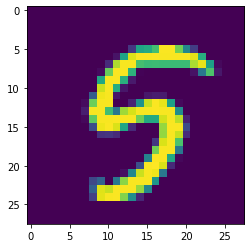

In [8]:
plt.imshow(train_images[8])


In [9]:
train_images = train_images.reshape((42000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((28000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [29]:
train_images.shape

(42000, 28, 28, 1)

In [34]:
model = models.Sequential()

model.add(layers.Dense(512,activation = "relu"))
model.add(layers.Dense(512,activation = "relu"))
model.add(layers.Dense(10,activation= "softmax"))

model.compile(optimizer = "adam",
                loss = "categorical_crossentropy",
                metrics = "accuracy")

In [36]:
model.fit(train_images,Y,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2047 - accuracy: 0.9365
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0874 - accuracy: 0.9720
Epoch 3/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0608 - accuracy: 0.9808
Epoch 4/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0447 - accuracy: 0.9859
Epoch 5/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0348 - accuracy: 0.9885
Epoch 6/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0302 - accuracy: 0.9905
Epoch 7/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0260 - accuracy: 0.9915
Epoch 8/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0219 - accuracy: 0.9926
Epoch 9/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0212 - accuracy: 0.9937
Epoch 10/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.019

In [37]:
tahmin = model.predict(test_images)
tahmin[0]
tahmin.shape

(28000, 10)

In [40]:
model = models.Sequential([
layers.Conv2D(64, (3, 3), activation='relu', input_shape = [28,28,1]),
layers.BatchNormalization(),
layers.Conv2D(128, (2, 2), activation='relu'),
layers.BatchNormalization(),
layers.Conv2D(256, (2, 2), activation='relu'),
layers.BatchNormalization(),
layers.Conv2D(512, (2, 2), activation='relu'),
layers.Flatten(),
layers.Dense(100,activation='relu'),
layers.Dense(10,activation='softmax')
])
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_12 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 25, 25, 128)       32896     
_________________________________________________________________
batch_normalization_13 (Batc (None, 25, 25, 128)       512       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 256)       131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 256)       1024      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 23, 23, 512)      

In [41]:
model.compile(
        optimizer='adam',
        loss=tf.losses.CategoricalCrossentropy(),
        metrics=['acc']
    )
model.fit(train_images,Y,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 27s 20ms/step - loss: 0.7341 - acc: 0.9273
Epoch 2/10
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0829 - acc: 0.9774
Epoch 3/10
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0596 - acc: 0.9831
Epoch 4/10
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0463 - acc: 0.9865
Epoch 5/10
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0333 - acc: 0.9905
Epoch 6/10
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0280 - acc: 0.9917
Epoch 7/10
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0225 - acc: 0.9936
Epoch 8/10
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0205 - acc: 0.9940
Epoch 9/10
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0214 - acc: 0.9944
Epoch 10/10
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0168 - acc: 0.9954


In [31]:
train_images.shape

(42000, 28, 28, 1)

In [19]:
tahmin = model.predict(test_images.reshape(-1,28,28,1))
tahmin[0]
tahmin.shape

(28000, 10)

In [22]:
import numpy as np
predict = []
for i in range(tahmin.shape[0]):
    predict.append(np.argmax(tahmin[i]))
predict = pd.DataFrame(predict)
sub = pd.read_csv("../input/digit-recognizer/sample_submission.csv")
image_id = sub[["ImageId"]]

In [23]:
submission = pd.concat([image_id,predict],axis=1)
submission.columns = ["ImageId","Label"]
submission.to_csv("Submission.csv",index=False)